In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('creditcard.csv')
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [4]:
print(df.info())
print()
print(df.columns)
print()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(284807, 31)

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
df["Class"].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [8]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

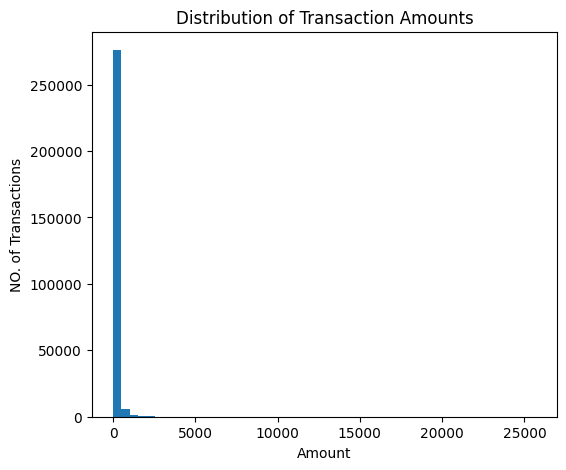

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.hist(df["Amount"],bins=50)
plt.xlabel("Amount")
plt.ylabel("NO. of Transactions")
plt.title("Distribution of Transaction Amounts")
plt.show()

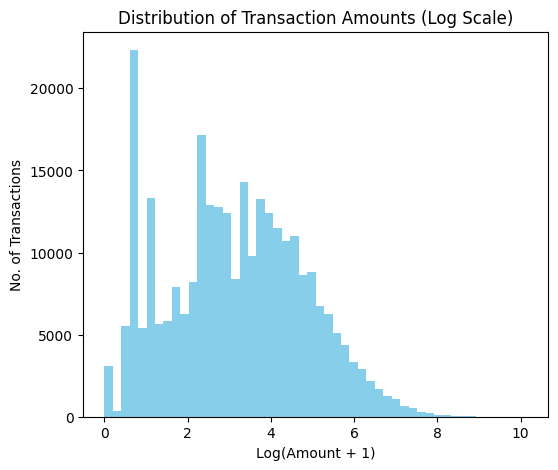

In [ ]:
import numpy as np

plt.figure(figsize=(6,5))
plt.hist(np.log1p(df["Amount"]), bins=50, color='skyblue')
plt.xlabel("Log(Amount + 1)")
plt.ylabel("No. of Transactions")
plt.title("Distribution of Transaction Amounts (Log Scale)")
plt.show()


In [17]:
import seaborn as sns

plt.figure(figsize=(6,5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale('log')  # optional: log scale to see outliers better
plt.title("Transaction Amounts: Legit (0) vs Fraud (1)")
plt.show()


c:\Users\abuhu\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:145: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 2.2.6)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject